<a href="https://colab.research.google.com/github/shreesha69/plant-disease-detection/blob/main/Plantpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
from google.colab import drive

# Mount the Google Drive
try:
    drive.mount('/content/drive')
except Exception as e:
    # Handle the error
    print(f"Error mounting Google Drive: {e}")

Error mounting Google Drive: Error: credential propagation was unsuccessful


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Parameters
img_size = (224, 224)
batch_size = 32
num_classes = 3  # Adjusted for three classes: healthy, rust, powdery mildew

# Path to the dataset
base_dir = '/content/drive/My Drive/Plantpy/images'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained MobileNetV2 model + higher level layers
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Save the fine-tuned model
model.save('/content/drive/My Drive/Plantpy/fine_tuned_model.keras')


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.4467 - loss: 1.7414 - val_accuracy: 0.5333 - val_loss: 1.4538
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7175 - loss: 0.8292 - val_accuracy: 0.7667 - val_loss: 0.5619
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8631 - loss: 0.3609 - val_accuracy: 0.8667 - val_loss: 0.1735
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9480 - loss: 0.1294 - val_accuracy: 0.8667 - val_loss: 0.3891
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9790 - loss: 0.1349 - val_accuracy: 0.9000 - val_loss: 0.2516
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9704 - loss: 0.0724 - val_accuracy: 0.9333 - val_loss: 0.2183
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.8667 - val_loss: 0.2396
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - a

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


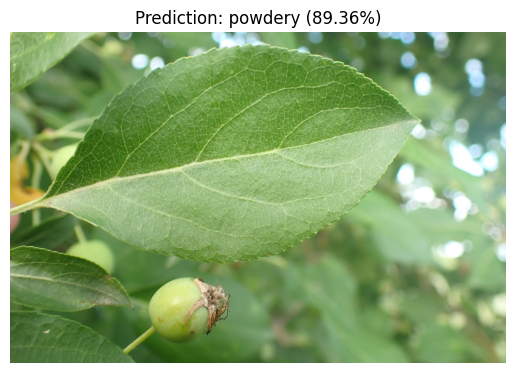

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


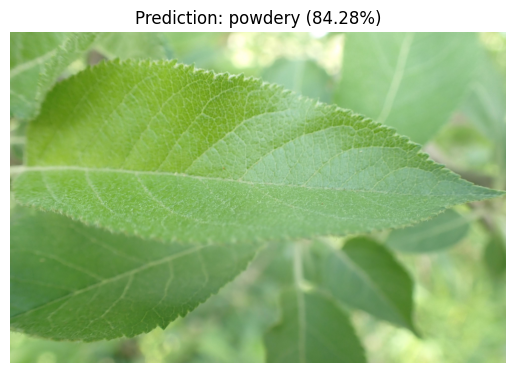

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


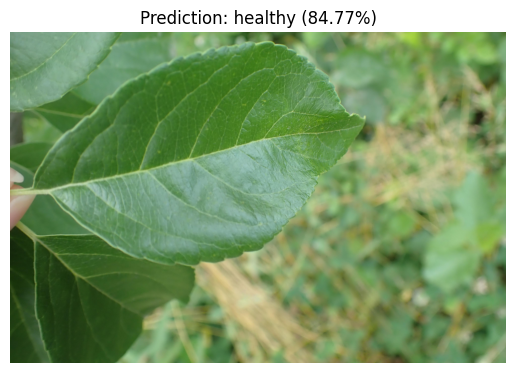

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


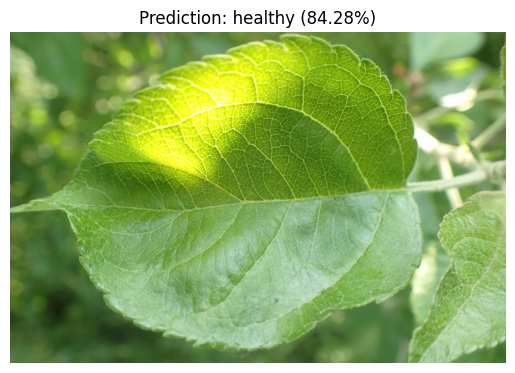

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


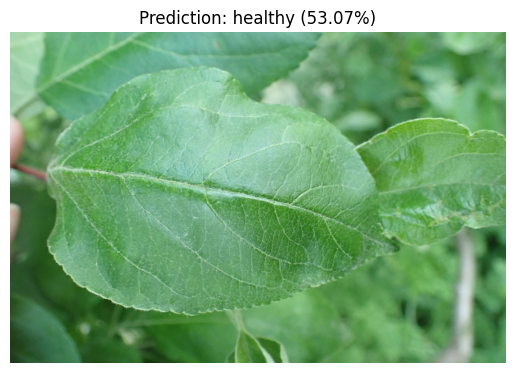

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


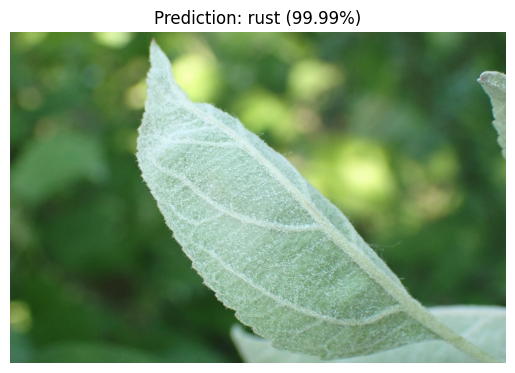

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


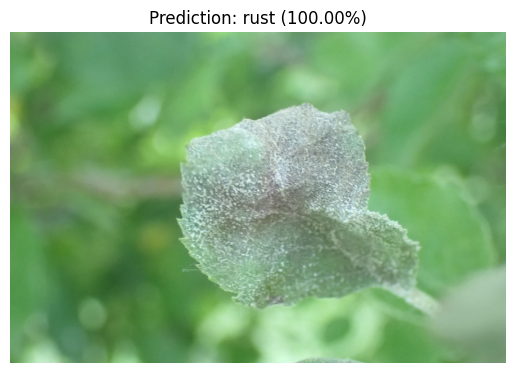

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


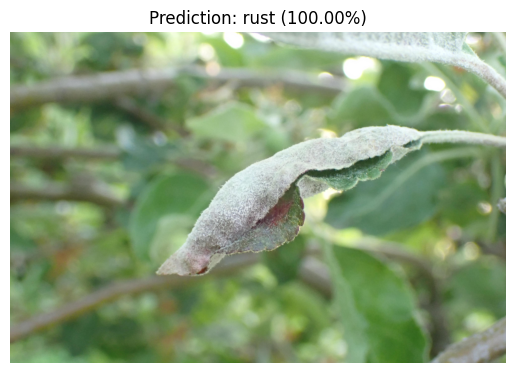

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


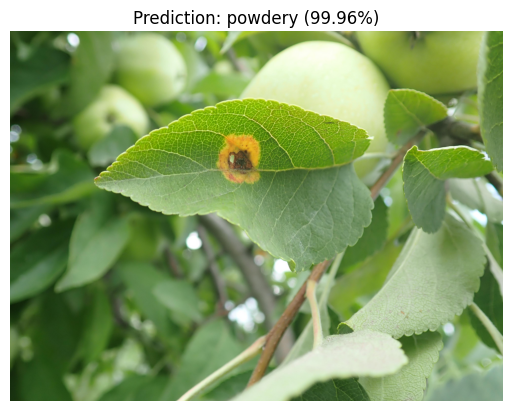

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


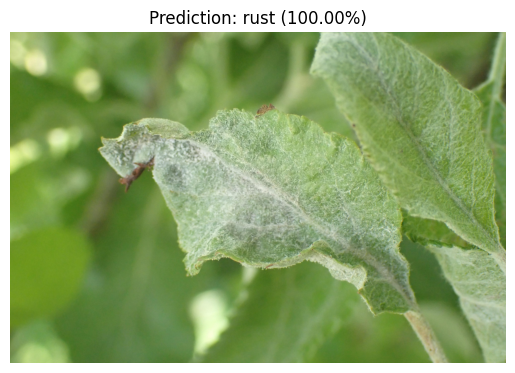

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


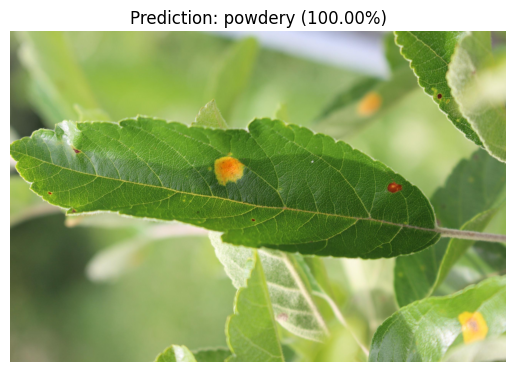

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


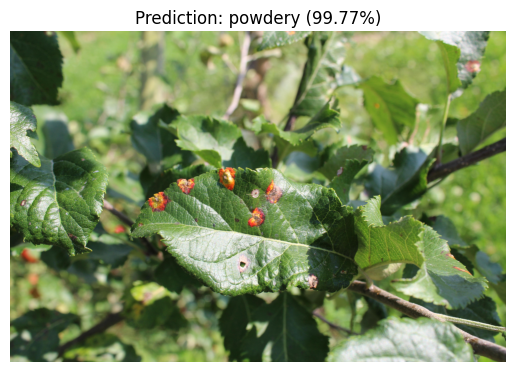

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


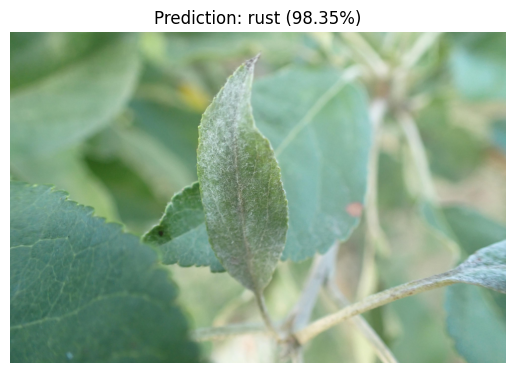

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


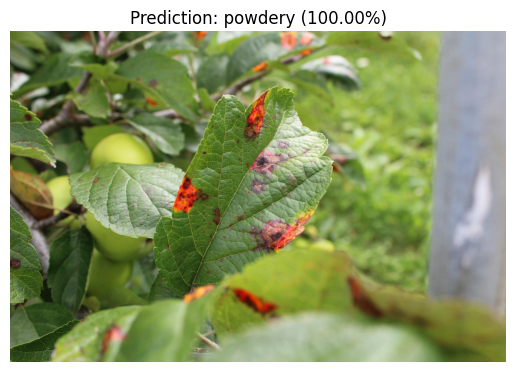

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


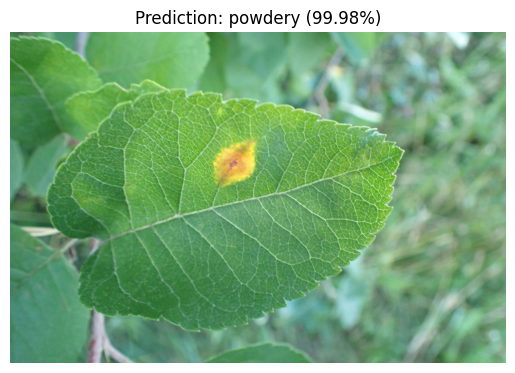

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Load the fine-tuned model
model = tf.keras.models.load_model('/content/drive/My Drive/Plantpy/fine_tuned_model.keras')

def load_and_preprocess_image(img_path):
    """Load and preprocess image."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def predict_disease(img_path):
    """Predict disease from image."""
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    return predictions

def display_prediction(img_path, predictions, class_indices):
    """Display image with predictions."""
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    class_labels = list(class_indices.keys())
    pred_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions) * 100
    plt.title(f'Prediction: {pred_class} ({confidence:.2f}%)')
    plt.show()

def process_directory(directory_path):
    """Process all images in the directory."""
    class_indices = {'healthy': 50, 'rust': 50, 'powdery': 50}  # Adjusted for three classes
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory_path, filename)
            predictions = predict_disease(img_path)
            display_prediction(img_path, predictions, class_indices)

# Directory containing images for prediction
image_directory = '/content/drive/My Drive/Plantpy/Valid'  # Update this path

# Process all images in the directory
process_directory(image_directory)
